### Test des pipelines conditionnelles

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath("../../"))
from pipeoptz import Pipeline, Node, NodeIf

In [2]:
def condition_func(threshold, value):
    return value > threshold

def traitement_true(data):
    print("Traitement dans la branche TRUE")
    return data * 2

def traitement_false(data):
    print("Traitement dans la branche FALSE")
    return data // 2

def f1():
    return 5

def f2():
    return 4

def integer(x):
    return x

In [3]:
pipeline_if = Pipeline("If Pipeline")

true_pipeline = Pipeline("TruePipeline")
true_pipeline.add_node(Node("T1", traitement_true), predecessors={"data":"run_params:data"})
true_pipeline.add_node(Node("T2", traitement_true), predecessors={"data": "T1"})
false_pipeline = Pipeline("FalsePipeline")
false_pipeline.add_node(Node("F1", traitement_false), predecessors={"data":"run_params:data"})

pipeline_if.add_node(Node("Start", f1))
pipeline_if.add_node(Node("ConditionInput", f2))
pipeline_if.add_node(NodeIf(id="IF1", condition_func=condition_func, 
                            true_pipeline=true_pipeline, false_pipeline=false_pipeline, 
                            fixed_params={"threshold": 5}),
                            predecessors={"condition_func:value":"ConditionInput", "data":"Start"})
pipeline_if.add_node(Node("End", integer), predecessors={"x": "IF1"})

Fichier .dot et .png généré.


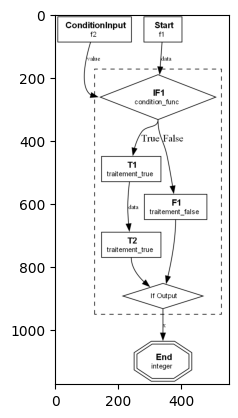

In [4]:
pipeline_if.to_dot("pipeline_example_cond.dot", generate_png=True)
plt.imshow(Image.open("pipeline_example_cond.png"))
print("Fichier .dot et .png généré.")

In [5]:
k, h, t = pipeline_if.run()
print("Résultat :", h[k])

Traitement dans la branche FALSE
Résultat : 2


In [6]:
pipeline_if.to_json("pipeline_example_cond.json")
print("Fichier .json générés.")

Fichier .json générés.


In [7]:
print("Chargement du JSON")
k, h, t = Pipeline.from_json("pipeline_example_cond.json").run()
print("Résultat :", h[k])

Chargement du JSON
Traitement dans la branche FALSE
Résultat : 2
